<a href="https://colab.research.google.com/github/ducthuanpham/Job/blob/main/homework_contour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

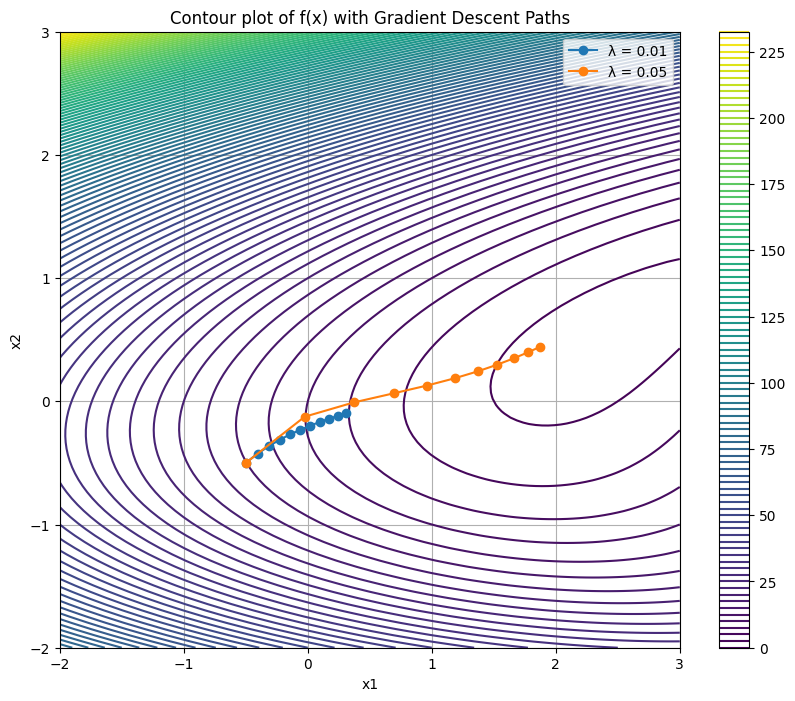

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the function f(x)
def f(x1, x2):
    return (x1 - x2**2 - 3)**2 + (x1 - x2 - 1)**2

# Define the gradient of f(x) with respect to x1
def df_dx1(x1, x2):
    return 4*x1 - 2*x2**2 - 2*x2 - 8

# Define the gradient of f(x) with respect to x2
def df_dx2(x1, x2):
    return 4*x2**3 - 4*x1*x2 + 14*x2 - 2*x1

# Define the gradient descent function
def gradient_descent(x_start, learning_rate, num_steps):
    x1_values = [x_start[0]]
    x2_values = [x_start[1]]
    for i in range(num_steps):
        x1 = x1_values[-1]
        x2 = x2_values[-1]
        x1 -= learning_rate * df_dx1(x1, x2)
        x2 -= learning_rate * df_dx2(x1, x2)
        x1_values.append(x1)
        x2_values.append(x2)
    return x1_values, x2_values

# Create a grid of x1 and x2 values for contour plot
x1 = np.linspace(-2, 3, 100)
x2 = np.linspace(-2, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Plot contour plot of f(x)
plt.figure(figsize=(10, 8))
plt.contour(X1, X2, Z, levels=100)

# Perform gradient descent with lambda = 0.01 and lambda = 0.05
x_start = (-0.5, -0.5)
x1_values_001, x2_values_001 = gradient_descent(x_start, learning_rate=0.01, num_steps=10)
x1_values_005, x2_values_005 = gradient_descent(x_start, learning_rate=0.05, num_steps=10)

# Plot the gradient descent paths
plt.plot(x1_values_001, x2_values_001, marker='o', label='λ = 0.01')
plt.plot(x1_values_005, x2_values_005, marker='o', label='λ = 0.05')
# ax=plt.subplots(1,1)
# cp = ax.contourf(X1, X2, Z)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour plot of f(x) with Gradient Descent Paths')
plt.legend()
plt.colorbar()
plt.grid(True)
plt.show()